Iteration 1, loss = 0.44139186
Iteration 2, loss = 0.19174891
Iteration 3, loss = 0.13983521
Iteration 4, loss = 0.11378556
Iteration 5, loss = 0.09443967
Iteration 6, loss = 0.07846529
Iteration 7, loss = 0.06506307
Iteration 8, loss = 0.05534985
Training set score: 0.986429
Test set score: 0.953061


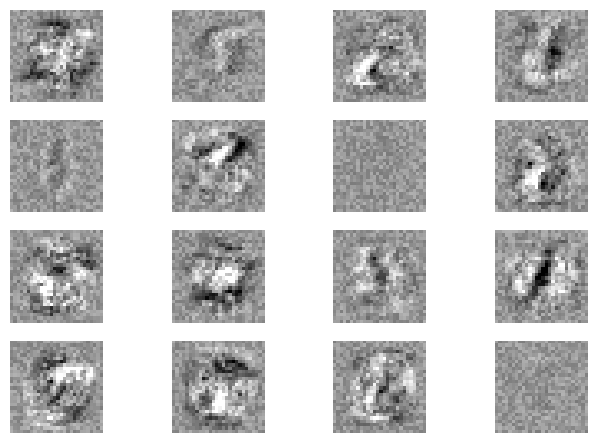

In [1]:
# 导入操作系统库
import os
# 更改工作目录
os.chdir(r"D:\softwares\applied statistics\pythoncodelearning\chap10\sourcecode")
# 导入警告库
import warnings
# 导入基础计算库
import numpy as np
# 导入绘图库
import matplotlib.pyplot as plt
# 导入收敛警告工具
from sklearn.exceptions import ConvergenceWarning
# 导入MLP分类器
from sklearn.neural_network import MLPClassifier
# 导入数据集工具
from sklearn.datasets import fetch_openml
# 导入数据集划分工具
from sklearn.model_selection import train_test_split
# 导入绘图库中的字体管理包
from matplotlib import font_manager
# 实现中文字符正常显示
font = font_manager.FontProperties(fname=r"C:\Windows\Fonts\SimKai.ttf")
# 使用seaborn风格绘图
plt.style.use("seaborn-v0_8")
# 加载数据
X, y = fetch_openml(
    "mnist_784", version=1, return_X_y=True, as_frame=False, parser="pandas"
)
X = X / 255.0
# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=0, test_size=0.7
)
# 构建MLP分类器
mlp = MLPClassifier(
    hidden_layer_sizes=(40, ), # 隐藏层的个数
    max_iter=8, # 最大迭代次数
    alpha=1e-4,
    solver="sgd",
    verbose=10,
    random_state=1,
    learning_rate_init=0.2,
)
# 忽视警告
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
    # 拟合模型
    mlp.fit(X_train, y_train)
# 训练集上和测试集上模型的分类准确率
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))
# 开始绘图
fig, axes = plt.subplots(4, 4)
# 可视化模型的权重系数
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=0.5 * vmin, vmax=0.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()
fig.savefig("../codeimage/code2.pdf")
